In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv")

In [ ]:
df

,area,forn,numero_dosi,data_consegna,N1,N2,ISTAT,reg
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
7570,VEN,Moderna,72600,2022-09-26,ITH,ITH3,5,Veneto
7571,VEN,Pfizer/BioNTech,77760,2022-10-20,ITH,ITH3,5,Veneto
7572,VEN,Pfizer Pediatrico,38400,2022-10-31,ITH,ITH3,5,Veneto
7573,VEN,Pfizer/BioNTech,77760,2022-11-15,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file


In [ ]:
len(df)

In [ ]:
df.count()

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente


In [ ]:
regione=input("inserisci il nome di una regione")
print(regione)

inserisci il nome di una regioneVeneto
Veneto


In [ ]:
df.reg[df.reg==regione].count()

0

In [ ]:
len(df.reg[df.reg==regione])

207

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente


In [ ]:
x = df.reg[df.reg==regione].count()

In [ ]:
print(x if x > 0 else "non presente")

4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente


In [ ]:
regione=input("inserisci il nome di una regione")
print(regione)

inserisci il nome di una regioneAbruzzo
Abruzzo


In [ ]:
dfgruop=df.groupby(df.reg[df.reg == regione])[["numero_dosi"]].sum().reset_index()
dfgruop

,reg,numero_dosi
0,Veneto,12865842


5. visualizzare il numero totale di vaccini per ogni fornitore


In [ ]:
df.groupby(df.forn)[["numero_dosi"]].sum().reset_index()

6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini


In [ ]:
regione=input("inserisci il nome di una regione")
print(regione)

inserisci il nome di una regioneAbruzzo
Abruzzo


In [ ]:
import time
start = time.time()
dfbar=df.groupby(df.forn[df.reg==regione])[["numero_dosi"]].sum().sort_values("numero_dosi",ascending=False).reset_index()
end = time.time()
print(end - start)

In [ ]:
dfbar

,forn,numero_dosi
0,Pfizer/BioNTech,2340612
1,Moderna,617859
2,Vaxzevria (AstraZeneca),298453
3,Pfizer Pediatrico,150000
4,Janssen,35900
5,Novavax,21900


7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre verticali e uno a barre orizzontali. Indicare in modo appropriato il titolo, la legenda e le informazioni presenti negli assi


Text(0.5, 1.0, 'numero di vacini per una regione insetita da un utente')

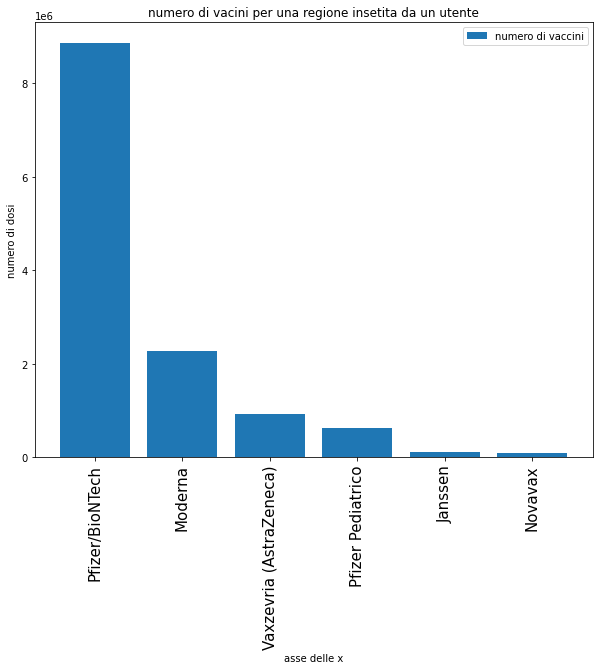

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(dfbar.forn,dfbar["numero_dosi"],label="numero di vaccini")
plt.xticks(rotation=90,fontsize=15)
ax.legend()
ax.set_xlabel('asse delle x')
ax.set_ylabel('numero di dosi')
ax.set_title('numero di vacini per una regione insetita da un utente')

Text(0.5, 1.0, 'numero di vacini per una regione insetita da un utente')

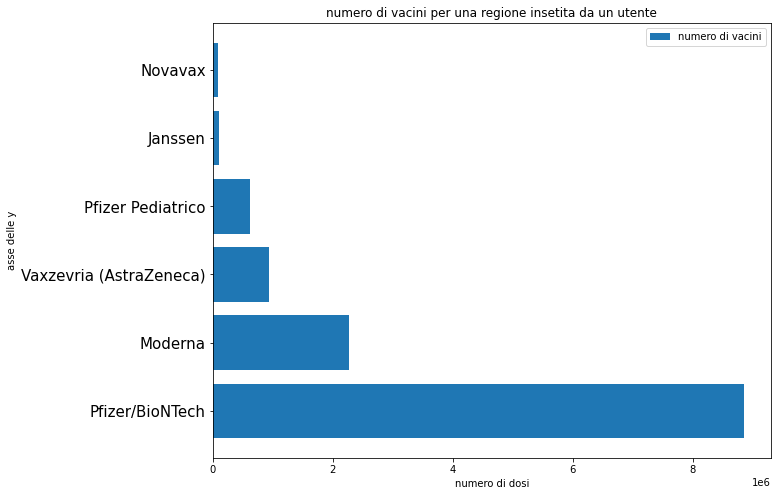

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(dfbar.forn,dfbar["numero_dosi"],label="numero di vacini")
plt.yticks(fontsize=15)
ax.legend()
ax.set_ylabel('asse delle y')
ax.set_xlabel('numero di dosi')
ax.set_title('numero di vacini per una regione insetita da un utente')

8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta


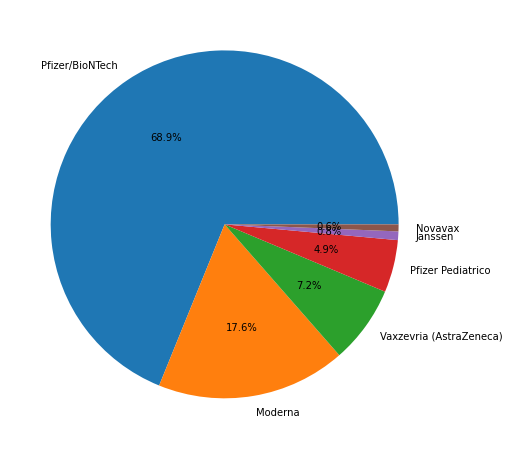

In [ ]:
plt.figure(figsize=(16, 8))
plt.pie(dfbar.numero_dosi, labels=dfbar.forn, autopct='%1.1f%%')
plt.show()

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap (cercare su internet)


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

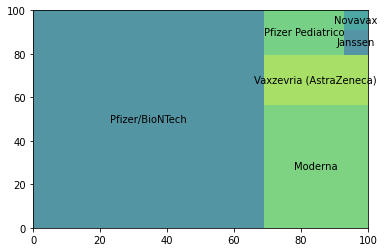

In [ ]:
squarify.plot(sizes=dfbar.numero_dosi, label=dfbar["forn"], alpha=.8)

10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini


In [ ]:
dfmag=df.groupby("reg")[["numero_dosi"]].sum().sort_values("numero_dosi",ascending=False).reset_index()

In [ ]:
dfmag[:3]

,reg,numero_dosi
0,Lombardia,27569009
1,Lazio,16179605
2,Campania,14665467


11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media dei vaccini consegnati nelle regioni


In [ ]:
dfmag[dfmag.numero_dosi < dfmag.numero_dosi.mean()][['reg']]

,reg
9,Calabria
10,Sardegna
11,Marche
12,Liguria
13,Abruzzo
14,Friuli-Venezia Giulia
15,Umbria
16,Basilicata
17,Provincia Autonoma Trento
18,Provincia Autonoma Bolzano / Bozen


In [ ]:
df.head(1)

,area,forn,numero_dosi,data_consegna,N1,N2,ISTAT,reg
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo


In [ ]:
df

12. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli ultimi sei mesi. Fare in modo che la data sia determinata in modo automatico (cercare su internet)

In [ ]:
import datetime

In [ ]:
t=datetime.date.today()

In [ ]:
mesi=int(t.month)

In [ ]:
print(type(t))

In [ ]:
print(t-int(df.data_consegna[1].month))

In [ ]:
f=datetime.date(year=1,month=4,day=1)

In [ ]:
h=datetime.date(year=1,month=6,day=1)

In [ ]:
f=f.month-h.month

In [ ]:
print(int(t.year)*12+int(t.month)-int(df.data_consegna[1][0:4])*12+int(df.data_consegna[1][5:7]))

In [ ]:
print(int(df.data_consegna[1][0:4])*12+int(df.data_consegna[1][5:7]))

In [ ]:
df.data_consegna[1][5:7]

In [ ]:
print(df.data_consegna[1][0:4])
if (t.year*12+t.month)-(int(df.data_consegna[1][0:4])*12+int(df.data_consegna[1][5:7])) >6:
  

In [ ]:
fig, ax = plt.subplots(figsize=(40,8))
ax.bar(df.reg[((df.reg=="Lombardia")|(df.reg=="Lazio"))&((t.year*12+t.month)-(int(df.data_consegna[1][0:4])*12+int(df.data_consegna[1][5:7])) >6)],df.numero_dosi,label="data")

ax.legend()
ax.set_ylabel('numero di dosi')
ax.set_title('numero di vacini per una regione insetita da un utente')